# Questão 1)

As rodovias federais brasileiras interligam cidades, estados e regiões. De acordo com o Departamento Nacional de Infraestrutura de Transportes (DNIT), há 5 categorias de rodovias: radiais, longitudinais, transversais, diagonais e de ligação.
Usando listcomps, desenvolva um programa que organiza os códigos das rodovias que passam pelo estado da Paraíba separando os algarismos da sigla “BR” e assinale a alternativa correta quanto ao número de rodovias por categoria:

A. 1 longitudinal / 4 transversais / 3 diagonais / 4 de ligação.

B. 2 longitudinais / 4 transversais / 3 diagonais / 6 de ligação.

C. 4 longitudinais / 1 transversal / 1 diagonal / 6 de ligação.

D. 5 longitudinais / 1 transversal / 3 diagonais / 6 de ligação.


<div class="alert alert-block alert-success">
<b>Resposta:</b> C. 4 longitudinais / 1 transversal / 1 diagonal / 6 de ligação.
</div>

Primeiramente importarei os módulos necessários para que o script rode corretamente: **requests**, **bs4**, e **pandas**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

##### Set-up para fazer o scraping

1. Passar o link que contém os dados desejados para o requests;
2. Extrair o HTML da página com requests;
3. Passar o HTML para o parser lxml com o BeautifulSoup.

In [2]:
url      = 'https://pt.wikipedia.org/wiki/Categoria:Rodovias_federais_da_Paraíba'
response = requests.get(url)
html     = response.text
soup     = BeautifulSoup(html, 'lxml')


##### Localizando e extraindo a informação desejada

Através da inspeção de elemento com o meu browser, pude localizar a parte do HTML da página que continha os nomes das rodovias para que pudesse passar para o parser essa informação para que ele me retorne os nomes
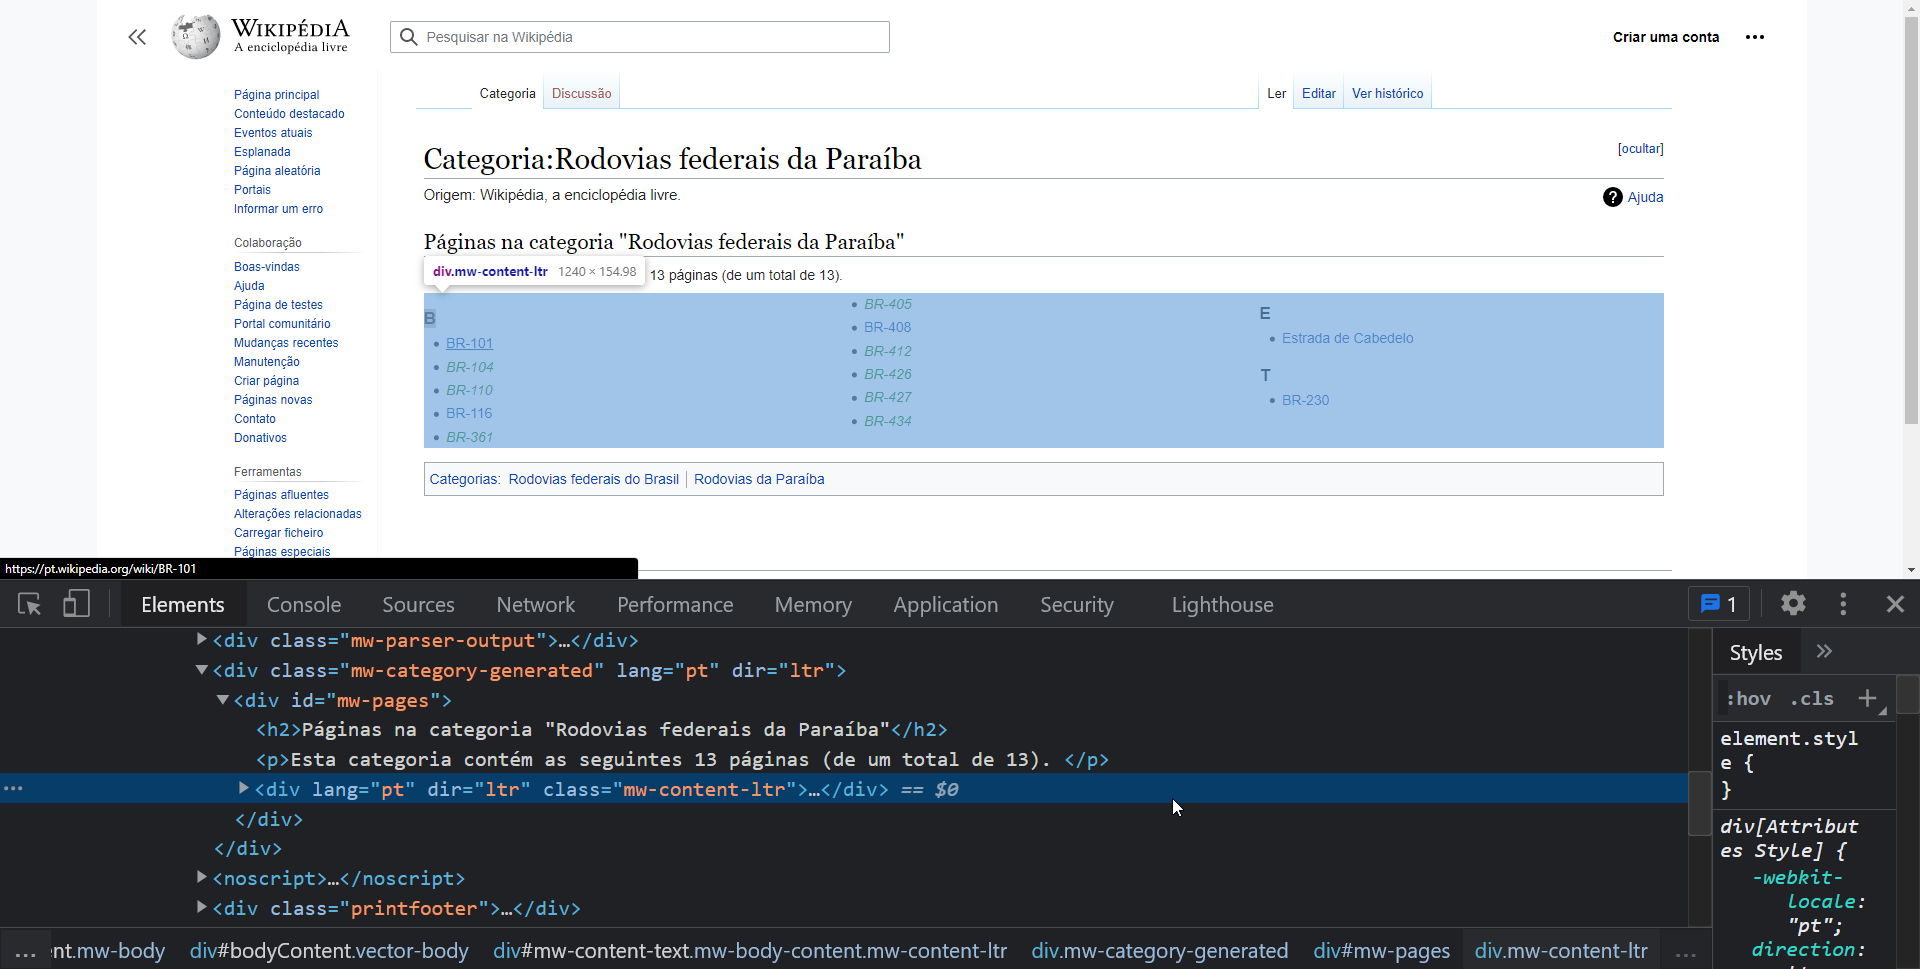

In [3]:
paginas_brs = soup.find_all('div', {'class':'mw-category-group'})

In [4]:
lista_rodovias_temp = []
for cat in paginas_brs:
    lista_rodovias_temp.append(cat.text.split('\n'))

#No fim do loop a minha lista acima estará com 3 sublistas    
#[
#['B','BR-101','BR-104','BR-110','BR-116','BR-361','BR-405','BR-408','BR-412','BR-426','BR-427','BR-434'],
#['E', 'Estrada de Cabedelo'],
#['T', 'BR-230']
#]

##### Tratando as informações obtidas

Ao extrair todos os items que me interessavam agora irei realizar um pouco de data wrangling para ajustar a informação do jeito que eu desejo trabalhar, e remover tudo aquilo não me é útil

O loop abaixo realizará duas importantes coisas para que eu possa ter minha lista com o todas as rodovias federais que cruzam a Paraíba
1. Extrair apenas os nomes das rodoviais
2. Unidimensionar minha lista

E no fim irá ser realizado um **sort()** para que eu tenha as rodovias por ordem crescente

In [5]:
lista_rodovias_final = []
for lista in lista_rodovias_temp:
    for sublista in lista:
        if 'BR-' in sublista:
            lista_rodovias_final.append(sublista)
lista_rodovias_final.sort()

#lista_rodovias_final = ['BR-101','BR-104','BR-110','BR-116','BR-230','BR-361','BR-405','BR-408','BR-412','BR-426',
#'BR-427','BR-434']

##### Categorizando as rodovias

Utilizando a lista_rodovias_final irei, com um loop, realizar duas coisas:
* Popular uma lista '**categorias**' da acordo com a instruções __[contidas no site do DNIT](https://www.gov.br/dnit/pt-br/rodovias/rodovias-federais/nomeclatura-das-rodovias-federais)__;
* Popular uma lista '**apenas_numeros**' com os números das respectivas rodovias

In [6]:
categorias = []
apenas_numero = []
for br in lista_rodovias_final:
    numeros = br.split('-')
    if numeros[1].startswith("0"):
        categorias.append("Radial")
    elif numeros[1].startswith("1"):
        categorias.append("Longitudinal")
    elif numeros[1].startswith("2"):
        categorias.append("Transversal")
    elif numeros[1].startswith("3"):
        categorias.append("Diagonal")
    elif numeros[1].startswith("4"):
        categorias.append("Ligação")
    apenas_numero.append(numeros[1])
    
#categorias = ['Longitudinal', 'Longitudinal', 'Longitudinal', 'Longitudinal', 'Transversal', 'Diagonal', 'Ligação',
#'Ligação', 'Ligação', 'Ligação', 'Ligação', 'Ligação']
#apenas_numero = ['101', '104', '110', '116', '230', '361', '405', '408', '412', '426', '427', '434']

###### Criando um dataframe para organizar todos os dados e contar os dados

Com todos os dados devidamente extraidos e tratados, passarei as minhas listas para o pandas para que possa criar um dataframe, e com isso eu terei todos os dados relevantes à questão em uma única variável

In [7]:
df_rodovias = pd.DataFrame({"Rodovia":lista_rodovias_final, "Categoria":categorias, "Número":apenas_numero})
df_rodovias = df_rodovias.set_index("Rodovia")
#Resposta:
df_rodovias.groupby('Categoria').size()

Categoria
Diagonal        1
Ligação         6
Longitudinal    4
Transversal     1
dtype: int64

# Questão 2

Segundo o Balanço Energético Nacional 2019, a matriz elétrica brasileira estava distribuída segundo o gráfico abaixo:
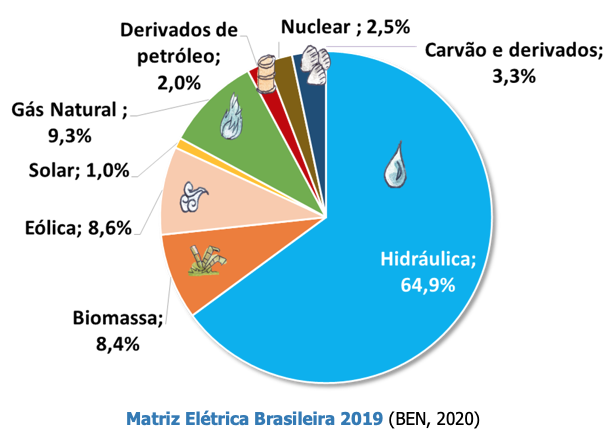
*Distribuição da matriz elétrica brasileira no final de 2019.*

Fonte: [[EPE]](https://www.epe.gov.br/pt/abcdenergia/matriz-energetica-e-eletrica).

Crie um dicionário em que as _keys_ e _values_ correspondam, respectivamente, às fontes de energia legendadas no gráfico e ao percentual que ocupam na matriz energética. Considerando que

- _i_ é o índice da _key_ "Biomassa" no _dict_ ordenado por valor percentual **crescente** e
- _j_ é o índice da _key_ "Eólica" no _dict_ ordenado por valor percentual **decrescente**,

assinale a alternativa correta:

A. _i_ = 4 e _j_ = 2.

B. _i_ = 5 e _j_ = 3.

C. _i_ = 0 e _j_ = 7.

D. _i_ = 3 e _j_ = 6.

<div class="alert alert-block alert-success">
<b>Resposta:</b> A. <i>i</i> = 4 e <i>j</i> = 2.
</div>

Primeiramente irei importar o módulo **random** para que eu possa randomizar o dicionário digitado por mim, para garantir que seja obtido sempre o mesmo resultado, independente da ordem digitada por mim inicialmente
Logo após criei o dicionário inicial com as informações extraídas da imagem fornecida previamente.

Em seguida criei dois dicionarios vazios:
* **matriz_eletrica_rdm** irá receber os valores de matriz_eletrica de uma maneira aleatória
* **matriz_eletrica_asc** irá ser populado com os valores da matriz elétrica brasileira ordenada por crescente de participação


In [8]:
import random

matriz_eletrica = {
 'Hidráulica': 64.9,
 'Biomassa': 8.4,
 'Eólica': 8.6,
 'Solar': 1.0,
 'Gás Natural': 9.3,
 'Derivados de petróleo': 2.0,
 'Nuclear': 2.5,
 'Carvão e derivados': 3.3
}
matriz_eletrica_asc = {}
matriz_eletrica_rdm = {}

keys = list(matriz_eletrica.keys())
#keys = ['Hidraulica', 'Biomassa', 'Eólica', 'Solar', 'Gás Natural', 'Derivados de petróleio', 'Nuclear', 'Carvão e derivados']

random.shuffle(keys)
for key in keys:
    matriz_eletrica_rdm[key] = matriz_eletrica[key]



Agora a variável **sorted_values** irá receber os valores de cada fonte energética organizado por ordem crescente

In [9]:
sorted_values = sorted(matriz_eletrica_rdm.values())
#sorted_values = [1.0, 2.0, 2.5, 3.3, 8.4, 8.6, 9.3, 64.9]

O seguinte loop estará passando por um dos valores da lista criada acima, que então será usado para popular o dicionário **matriz_eletrica_asc** criado anteriormente, atráves de um matching do valor da key do **dict matriz_eletrica_rdm** com valor do iterador **value**

In [10]:
for value in sorted_values:
    for key in matriz_eletrica.keys():
        if matriz_eletrica_rdm[key] == value:
            matriz_eletrica_asc[key] = matriz_eletrica_rdm[key]

Em seguida, é criado uma **lista_temp** que irá receber todas as **keys de matriz_eletrica_asc**
e com isso verificamos que o índice da key '**Biomasssa**', quando ordenados por ordem crescente, é igual a **4**

In [11]:
lista_temp = list(matriz_eletrica_asc)

for i in range(len(lista_temp)):
    print(f"Key index #: {i} | Fonte elétrica: {lista_temp[i]}")

Key index #: 0 | Fonte elétrica: Solar
Key index #: 1 | Fonte elétrica: Derivados de petróleo
Key index #: 2 | Fonte elétrica: Nuclear
Key index #: 3 | Fonte elétrica: Carvão e derivados
Key index #: 4 | Fonte elétrica: Biomassa
Key index #: 5 | Fonte elétrica: Eólica
Key index #: 6 | Fonte elétrica: Gás Natural
Key index #: 7 | Fonte elétrica: Hidráulica


In [10]:
from collections import OrderedDict
energy = {
 'Hidráulica': 64.9,
 'Biomassa': 8.4,
 'Eólica': 8.6,
 'Solar': 1.0,
 'Gás Natural': 9.3,
 'Derivados de petróleo': 2.0,
 'Nuclear': 2.5,
 'Carvão e derivados': 3.3
}

sortedEnergy = OrderedDict(sorted(energy.items(), key=lambda x:x[1]))
#print(sortedEnergy)

minha_lista = list(sortedEnergy)
for i in range(len(minha_lista)):
    if 'Biomassa' in minha_lista[i]:
        print(f'O índex do elemento {minha_lista[i]} é {i}')

O índex do elemento Biomassa é 4


In [5]:
dir(sortedEnergy)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'move_to_end',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

A mesma operação será feita só que dessa vez utilizei a lista criada na célula anterior para criar uma outra lista de ordem reversa.
Dessa vez, verificamos que ao inverter a ordem da lista para ordem decrescente, o valor do índice da key **Éolica** é igual a **2**

In [12]:
lista_temp_reversa = lista_temp[::-1]
for i in range(len(lista_temp_reversa)):
    print(f"Key index #: {i} | Fonte elétrica: {lista_temp_reversa[i]}")

Key index #: 0 | Fonte elétrica: Hidráulica
Key index #: 1 | Fonte elétrica: Gás Natural
Key index #: 2 | Fonte elétrica: Eólica
Key index #: 3 | Fonte elétrica: Biomassa
Key index #: 4 | Fonte elétrica: Carvão e derivados
Key index #: 5 | Fonte elétrica: Nuclear
Key index #: 6 | Fonte elétrica: Derivados de petróleo
Key index #: 7 | Fonte elétrica: Solar


# Questão 3
Para que um número de CPF (Cadastro de Pessoa Física) brasileiro seja considerado válido, a soma de todos os seus dígitos deve resultar em um número com dois dígitos iguais. Por exemplo, o número de CPF $003.939.708\text{-}41$ é válido porque 

$$0 + 0 + 3 + 9 + 3 + 9 + 7 + 8 + 4 + 1 = 44.$$

Adicionalmente, a sua autenticidade pode ser verificada observando o último dígito imediatamente anterior ao hífen, o qual determina o estado de origem daquele número de CPF. 

Considerando que um número de CPF possa ser escrito pela máscara

$$abc.def.ghi\text{-}jk,$$

o estado ao qual o número de CPF pertence será determinado a partir da correspondência abaixo.

- $i=0$: Rio Grande do Sul    
- $i=1$: Distrito Federal – Goiás – Mato Grosso – Mato Grosso do Sul – Tocantins    
- $i=2$: Pará – Amazonas – Acre – Amapá – Rondônia – Roraima    
- $i=3$: Ceará – Maranhão – Piauí    
- $i=4$: Pernambuco – Rio Grande do Norte – Paraíba – Alagoas    
- $i=5$: Bahia – Sergipe    
- $i=6$: Minas Gerais    
- $i=7$: Rio de Janeiro – Espírito Santo
- $i=8$: São Paulo
- $i=9$: Paraná – Santa Catarina

O CPF usado como modelo acima, por exemplo, pertence a São Paulo, já que $i = 8$.

Fonte: [[ACE Guarulhos]](https://www.aceguarulhos.com.br/blog/como-saber-se-um-cpf-e-verdadeiro/#gsc.tab=0)

A função a seguir cria _n_ CPFs fictícios de modo aleatório:

```python
import random 
def random_cpf(n):
    random.seed(38)
    cpf = []    
    for _ in range(n):              
        n = random.randrange(10000000000,99999999999)
        cpf.append(n)
    return cpf 
```    

Execute esta função para _n_=20. Em seguida, faça um programa para checar se os CPFs gerados são válidos ou inválidos, bem como para determinar o estado brasileiro desses CPFs. Assinale a alternativa correta.

A. Existem apenas 3 CPFs válidos e 1 deles pertence ao Acre.

**B. Existem apenas 5 CPFs válidos e 2 deles pertencem a São Paulo.**

C. Existe apenas 1 CPF válido, pertencente a Rondônia.

D. Todos os CPFs são válidos, exceto o último da lista.

<div class="alert alert-block alert-success">
<b>Resposta:</b> B. Existem apenas 5 CPFs válidos e 2 deles pertencem a São Paulo.
</div>


**Dica:** use expressão regular.

In [13]:
import random 
def random_cpf(n):
    random.seed(38)
    cpf = []    
    for _ in range(n):              
        n = random.randrange(10000000000,99999999999)
        cpf.append(n)
    return cpf

def validar_cpf(cpf):
    cpf_as_str = str(cpf)
    if len(cpf_as_str) != 11:
        return False  

    if cpf_as_str == cpf_as_str[::-1]:
        return False

    for i in range(9,11):
        soma = sum(int(cpf[j])*((i+1)-j) for j in range(i))
        dv = soma%11
        if dv < 2:
            if cpf_as_str[i] != '0':
                return False
        else:
            dv = 11 - dv 
            if str(dv) != cpf_as_str[i]:
                return False



    estado = int(cpf_as_str[8])


    if estado == 0:
        return "RS"
    elif estado == 1:
        return "DF|GO|MG|MS|TO"
    elif estado == 2:
        return "PA|AM|AC|AP|RO|RR"
    elif estado == 3:
        return "CE|MA|PI"
    elif estado == 4:
        return "PE|RN|PB|AL"
    elif estado == 5:
        return "BA|SE"
    elif estado == 6:
        return "MG"
    elif estado == 7:
        return "RJ|ES"
    elif estado == 8:
        return "SP"
    elif estado == 9:
        return "PR|SC"
    
def validatorCPF(CPF):
    
    #Verificação para o primeiro dígito
    somaCPF = 0
    pesos = [10,9,8,7,6,5,4,3,2]
    for i in range(9):
        n = int(CPF[i])*pesos[i]
        somaCPF += n
    primeiro_digito = somaCPF % 11
    if primeiro_digito < 2:
        primeiro_digito = 0
    else:
        primeiro_digito = 11 - primeiro_digito
    
    if primeiro_digito != int(CPF[-2]):
        return "CPF inválido!"
    
    #Verificação do segundo dígito
    somaCPF = 0
    pesos = [11,10,9,8,7,6,5,4,3,2]
    for i in range(10):
        n = int(CPF[i])*pesos[i]
        somaCPF += n
    segundo_digito = somaCPF % 11
    if segundo_digito < 2:
        segundo_digito = 0
    else:
        segundo_digito = 11 - segundo_digito
    
    if segundo_digito != int(CPF[-1]):
        return "CPF inválido!"
    else:
        return "CPF válido!"

def validar_cpf_errado(cpf):
    soma_digitos = 0
    cpf_as_str = str(cpf)
    
    for numero in cpf_as_str:
        soma_digitos += int(numero)
    
    if soma_digitos%11 != 0:
        return "CPF falso"
    else:
        estado = int(cpf_as_str[8])
        if estado == 0:
            return "RS"
        elif estado == 1:
            return "DF|GO|MG|MS|TO"
        elif estado == 2:
            return "PA|AM|AC|AP|RO|RR"
        elif estado == 3:
            return "CE|MA|PI"
        elif estado == 4:
            return "PE|RN|PB|AL"
        elif estado == 5:
            return "BA|SE"
        elif estado == 6:
            return "MG"
        elif estado == 7:
            return "RJ|ES"
        elif estado == 8:
            return "SP"
        elif estado == 9:
            return "PR|SC"

lista_de_cpfs = random_cpf(20)
for cpf in lista_de_cpfs:
    print(validar_cpf_errado(cpf))

CPF falso
MG
PA|AM|AC|AP|RO|RR
CPF falso
SP
CPF falso
CPF falso
CPF falso
CPF falso
CPF falso
CPF falso
CPF falso
CPF falso
PE|RN|PB|AL
CPF falso
CPF falso
CPF falso
CPF falso
CPF falso
SP
